In [8]:
import numpy as np
from matplotlib import pyplot as plt
from ReferenceElement import *
import os
import imageio
from dg_wave_with_coord_trans_new import *
%matplotlib inline

In [18]:
x_p_0 = 0.
speed_limit = 0.5
def x_p(t):
    return x_p_0 + speed_limit*np.sin(t)
def y_to_x(y,t):
    return y + speed_limit*np.sin(t)
def x_p_dot(t):
    return speed_limit*np.cos(t)
def x_p_dot_dot(t):
    return -speed_limit*np.sin(t)
def analytical_u(x,x_p,t):
#     return np.cos(x+x_p(t)-t)+1/2*np.sin(x+x_p(t)+t)
    return np.sin(x+x_p(t)-t)
def analytical_p(x,xp,t):
#     return np.sin(x-t)+1/2*np.cos(x+t)
    return -np.cos(x-t)
def analytical_q(x,xp,t):
#     return -np.sin(x-t) +1/2*np.cos(x+t)
    return np.cos(x-t)

In [19]:
t_int = np.linspace(0,2*np.pi,200)
x = np.linspace(-2*np.pi,2*np.pi,201)

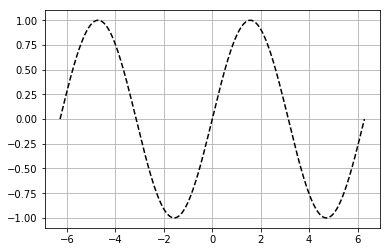

In [20]:
u = analytical_u(x,x_p,0)
plt.plot(x, u,ls='--',color ='black')
plt.grid()

In [21]:
direc = "ana_sine"
if os.path.isdir(direc):
    print('Directory'+direc+'already exists')
else:
    os.makedirs(direc)
images = []
for t in t_int:
    u = analytical_u(x,x_p,t)
    u_2 = np.sin(x-t)
    plt.figure(figsize=(11, 7), dpi=100)
    plt.grid()
    plt.plot(x, u,color ='black', label = 'sin(x+x_p(t)-t)')
    plt.plot(x, u_2,label = 'sin(x-t)')
    plt.xlim(-7,7)
    plt.ylim(-1.5,1.5)
    plt.title(str(np.round(t,3)))
    plt.legend()
    name = direc+"/figure"+str(np.round(t,3))+'.png'
    plt.savefig(name)
    images.append(imageio.imread(name))
    plt.close()
gifName = direc+'/movie.gif'
imageio.mimsave(gifName,images)